<h1>DiscreteZOO</h1>
<p>Visit our <a href="https://github.com/DiscreteZOO/DiscreteZOO-sage">GitHub</a> for more information on how to use the package.</p>

<h2>Loading the package</h2>

In [1]:
import discretezoo
from discretezoo.db import query
from discretezoo.db.query import Asc, Desc
from discretezoo.entities.zoograph import ZooGraph
from discretezoo.entities.cvt import CVTGraph, info
from discretezoo.entities.cvt.fields import *

<h2>Simple examples</h2>

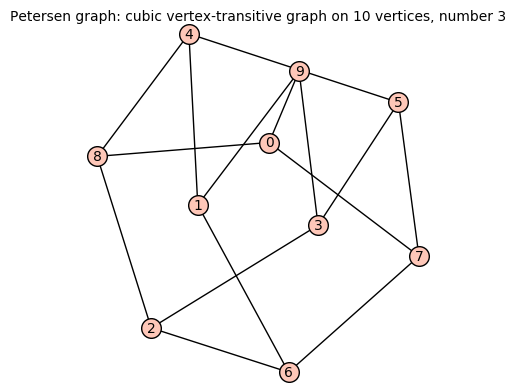

In [8]:
G = CVTGraph(10, 3) # CVTGraph object with cached properties returned from the database
G

In [9]:
G.is_isomorphic(graphs.PetersenGraph())

True

In [10]:
G.is_cayley() # Is G a Cayley graph?

False

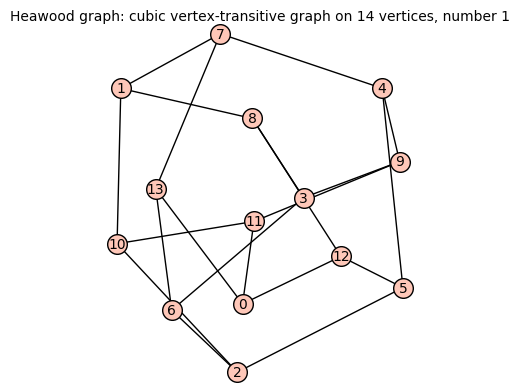

In [11]:
H = discretezoo.entities.cvt.CVTGraph(14, 1) # Heawood graph
H

In [12]:
H.is_cayley()

True

<h2>Counting</h2>

In [13]:
info.count() # Number of graphs in CVT repository

111711

In [14]:
info.count(diameter == 5) # The number of CVT graphs with diameter 5

37

In [15]:
info.count(diameter == 5, groupby = girth) # The number of CVT graphs with diameter 5 broken down by girth

{3: 1, 4: 7, 5: 2, 6: 18, 7: 3, 8: 3, 9: 3}

In [16]:
info.count(order <= 100, groupby = [girth, diameter]) # The number of CVT graphs for each (girth, diameter) pair

('graph.girth',
 {1: ('graph.diameter', {1: 1}),
  2: ('graph.diameter', {1: 1, 2: 1, 3: 1}),
  3: ('graph.diameter',
   {None: 11, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 2, 8: 4, 9: 2, 10: 3}),
  4: ('graph.diameter',
   {None: 17,
    2: 2,
    3: 5,
    4: 7,
    5: 7,
    6: 10,
    7: 18,
    8: 16,
    9: 19,
    10: 15,
    11: 8,
    12: 8,
    13: 7,
    14: 6,
    15: 5,
    16: 5,
    17: 5,
    18: 5,
    19: 5,
    20: 5,
    21: 5,
    22: 5,
    23: 5,
    24: 5,
    25: 5,
    26: 1}),
  5: ('graph.diameter', {None: 2, 2: 1, 5: 2, 6: 3, 7: 2, 9: 1}),
  6: ('graph.diameter',
   {None: 3,
    3: 1,
    4: 6,
    5: 18,
    6: 28,
    7: 47,
    8: 55,
    9: 76,
    10: 42,
    11: 25,
    12: 17,
    13: 12,
    14: 8,
    15: 5,
    16: 5,
    17: 3,
    18: 1}),
  7: ('graph.diameter', {4: 2, 5: 3, 6: 2, 7: 2, 8: 2, 10: 1, 11: 1, 13: 1}),
  8: ('graph.diameter', {4: 1, 5: 3, 6: 18, 7: 27, 8: 25, 9: 6, 10: 2}),
  9: ('graph.diameter', {5: 3}),
  10: ('graph.diameter', {7: 3, 

In [17]:
info.count(order < 500, ~is_cayley) # The number of CVT graphs of order less than 500 which are not Cayley graphs

403

In [18]:
info.count(girth + diameter == 10) # The number of CVT graphs whose girth and diameter sum to 10

18

In [19]:
info.count((girth == 8) | (diameter == 10)) # The number of CVT graphs with girth 8 or diameter 10

14450

<h2>Iterating</h2>

In [20]:
gen = info.all(girth == 5, orderby = Desc(order)) # CVT graphs with girth 5 ordered by their order
next(gen)

Cubic vertex-transitive graph on 1280 vertices, number 2591 (use the .plot() method to plot)

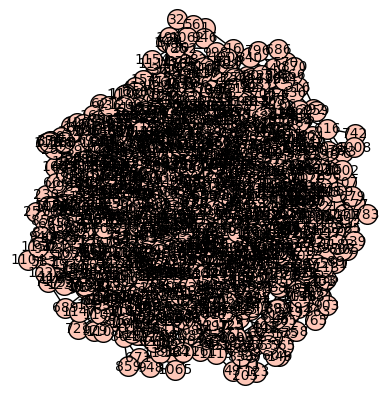

In [21]:
next(gen).plot()

In [22]:
# both simple CVT graphs with the order equal to the sum of girth and diameter
F1, F2 = info.all(girth + diameter == order, ~has_loops, ~has_multiple_edges)
(F1, F2)

(Tetrahedron: cubic vertex-transitive graph on 4 vertices, number 1,
 Utility graph: cubic vertex-transitive graph on 6 vertices, number 2)

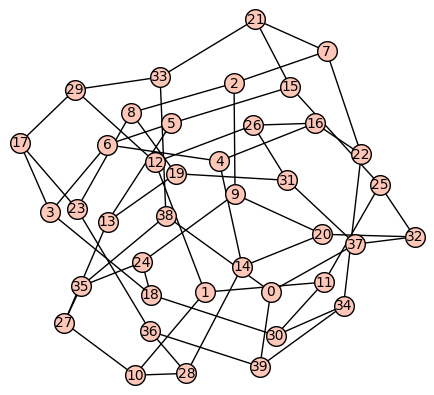

In [23]:
# The list of all CVT graphs of diameter 6, sorted first by descending girth and then by ascending order
L = list(info.all(diameter = 6, orderby = [Desc(girth), order]))
L[0].plot()

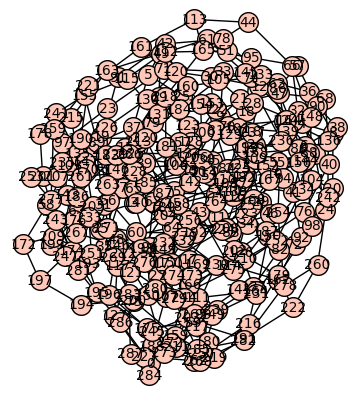

In [24]:
info.one(order = 288, orderby = Desc(girth)).plot() # A CVT graph of order 288 with largest girth

In [25]:
info.one(order = 288, orderby = Desc(girth), offset = 1) # A second such graph

Cubic vertex-transitive graph on 288 vertices, number 182 (use the .plot() method to plot)

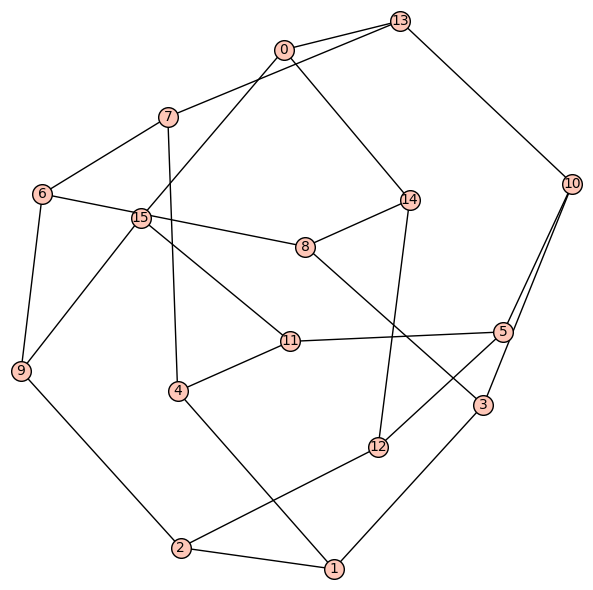

In [2]:
info.one(girth >= 6, diameter == 4).plot() # A graph with girth at least 6 and diameter 4

In [3]:
list(info.all(order == 1300))

[Cubic symmetric graph on 1300 vertices, number 1]

## Fetching only the properties

In [4]:
L = list(info.props(~is_cayley, girth == 13)) # the data on non-Cayley CVT graphs with girth 13
[{k: v for k, v in d.items() if k != 'data'} for d in L]

[{'average_degree': 3.00000000000000,
  'clique_number': 2,
  'connected_components_number': 1,
  'cvt_index': 104,
  'diameter': 9,
  'girth': 13,
  'has_multiple_edges': 0,
  'is_arc_transitive': 0,
  'is_bipartite': 0,
  'is_cayley': 0,
  'is_distance_regular': 0,
  'is_distance_transitive': 0,
  'is_edge_transitive': 0,
  'is_eulerian': 0,
  'is_forest': 0,
  'is_hamiltonian': 1,
  'is_moebius_ladder': 0,
  'is_overfull': 0,
  'is_partial_cube': 0,
  'is_prism': 0,
  'is_regular': 1,
  'is_split': 0,
  'is_spx': 0,
  'is_strongly_regular': 0,
  'is_tree': 0,
  'is_vertex_transitive': 1,
  'number_of_loops': 0,
  'odd_girth': 13,
  'order': 546,
  'size': 819,
  'triangles_count': 0,
  'zooid': 19428},
 {'average_degree': 3.00000000000000,
  'clique_number': 2,
  'connected_components_number': 1,
  'cvt_index': 547,
  'diameter': 11,
  'girth': 13,
  'has_multiple_edges': 0,
  'is_arc_transitive': 0,
  'is_bipartite': 0,
  'is_cayley': 0,
  'is_distance_regular': 0,
  'is_distance_t

In [5]:
L[0]['data']

':~?Ga_q@aBgFGN_]`CAACGGgJ?Z_m@iBkFGLOZ_c@QAWDWG?P`]AuDsEGKop`dB[CCGWVOl`fBQFwD_WOV@^AWEkHoZO]@P@{DKE_YoZ@l@YAwPw]o}`nBaHwRWfPT?SBu@WNgC_z_OBqAOMWH_y_[@q@wFWI?W_i@e@_TGE`R_]DE@oSgIOT_KEM?wXGAOD_P?cLKBgFoB_D?Y?{@gBoK_Z?K?c?_AoK?`?sAK@?GOD?bEmLcXwsQACBGAN{GGOpPadAUCc[WxPsbfC}ICSwiPnb`CmHcQWdPLa\\@}BsGgPplb\\IKSKgg?oI_V?m@S?W?oR_d?M?SAGCq{BKIUKghXOamdCI}JW^Wm@}b?IiJwiweaoa[JEHWhgeAf`}FeG?]gc`taSFYEwUW[@YbUJaL_mWfaya_JmS_mHPaxbeJiM_mwsaubSJ]IGlGhAtaeJMI_kgaavaKJYH?lGbatbaJmMOmgqATbEHYNWew}A[aEH]G_eHKamcsI}QwjHKAlcaIaQOiXHaocgJERGihLAjbAHuKOfgmaGa{G]RwmHOAxcMJIP?kxEaqc[JMQ?dXFaUcIGeOoagVoo`vBqEKKgUombNEaFKMg_pAdFIQSshxUcMdWO}I{UGipU`jBYOX@hACFcAOaOPAWXcL`gOqLkZgzpwb}OQO@@W]o}dBIIL{[HSQhdkQMUxGhYCSdiPUQXCHICPcUOAP`?XBCAcIOMPPDhCcVcyQARpGXDqKcYRuPpNHFqOI@HC`ScaDqZcxH{bCgAKsghQSagdPYRSfIXQqdhRiTDIhUSmO[`H?qAb~GADSIw}Pz`NAYDCIW}p}`XUS[w{HrBpfoSa^HQX]BMdyK}[HRhoDNe{TAZxSXeD[eYTuXPUHddXeOTiXHUx~D_f}UE]hVxyD]eKUIWxWhad_eGUEYpUHjdXicUMiXXIidcigUMipWyjdcfIOI[`?x^CCd}OUWXBX`CKe?RIWHKxpC[fEPu]PJhxcnfk

## Recognizing a graph

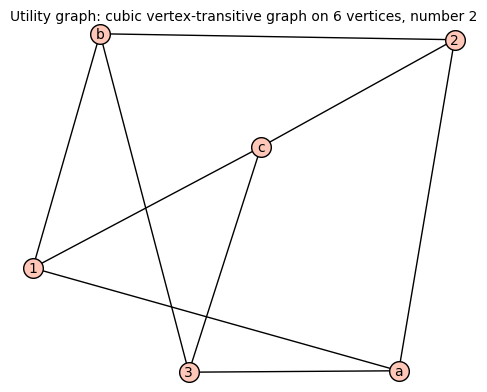

In [6]:
K33 = CVTGraph(list(cartesian_product([(1, 2, 3), ('a', 'b', 'c')])))
K33

In [7]:
K34 = CVTGraph(list(cartesian_product([(1, 2, 3), ('a', 'b', 'c', 'd')])))

AssertionError: Attribute is_vertex_transitive does not have value True

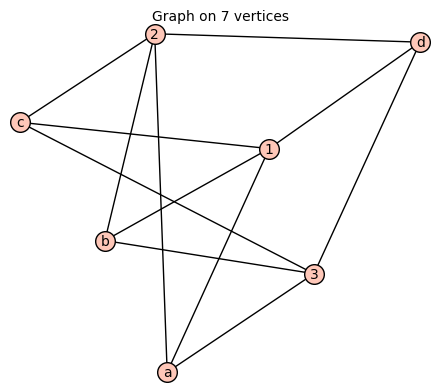

In [9]:
K34 = ZooGraph(list(cartesian_product([(1, 2, 3), ('a', 'b', 'c', 'd')])))
K34

<h2>A real life example</h2>

In [10]:
import discretezoo.entities.cvt
downloaded_graphs = [discretezoo.entities.cvt.CVTGraph(x) for x in ['8459a62b6532f2e40b8f2469252c0dfed3aa67fa58c09c6447136d8c15f090c1', 'be9009ace6fb3b3b61fd4198b276205fb2c1051f7d5490861519b18a336c10e9', 'ec8e3799aa8b909d5ebe9a2cd3201faf6b3d6e37bc1b9a3cd14c62d899ee90b0', '873e1df63aada579f09989d182e6db02121856a1beb5613c368e471f3d10f7f8']]

Truncated Octahedron


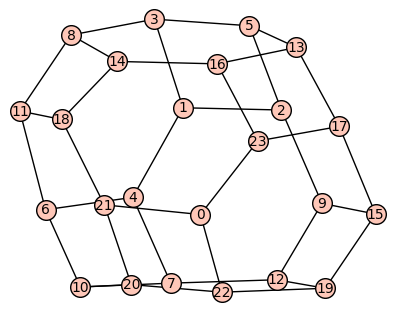

Desargues graph


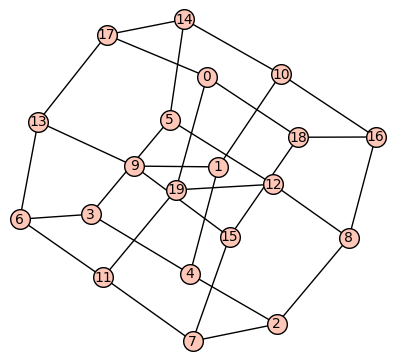

Truncated Icosidodecahedron


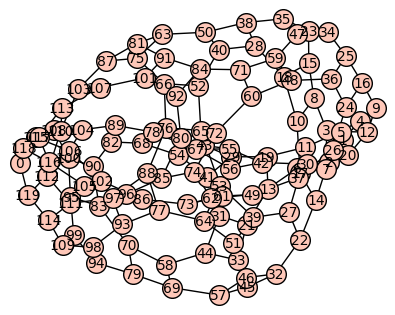

Truncated Cuboctahedron


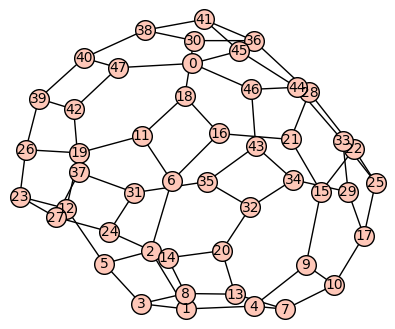

In [11]:
for graph in downloaded_graphs:
    print graph
    graph.show()

In [12]:
G = downloaded_graphs[2]
G

Truncated Icosidodecahedron: cubic vertex-transitive graph on 120 vertices, number 60 (use the .plot() method to plot)

In [13]:
G.is_partial_cube() # precomputed property

True

In [14]:
G.is_partial_cube(certificate = True) # certificate requested, will compute

(True,
 {0: '000000000000000',
  1: '111111111111111',
  2: '111110111111111',
  3: '111111111111110',
  4: '111011111111111',
  5: '110011111111111',
  6: '110110111111111',
  7: '111110111111110',
  8: '111111111011110',
  9: '111011110111111',
  10: '111111111010110',
  11: '110010111111111',
  12: '110011110111111',
  13: '100110111111111',
  14: '111110111110110',
  15: '111111111011100',
  16: '111011110111101',
  17: '111110111010110',
  18: '111111111010100',
  19: '100010111111111',
  20: '110011010111111',
  21: '100110101111111',
  22: '111110101110110',
  23: '111111110011100',
  24: '111011010111101',
  25: '111011110011101',
  26: '110011010111101',
  27: '111110101010110',
  28: '111111111010000',
  29: '100010111101111',
  30: '110011010101111',
  31: '100110101101111',
  32: '101110101110110',
  33: '100110101110111',
  34: '111011110011100',
  35: '111111110011000',
  36: '111011010011101',
  37: '110011010101101',
  38: '111111110010000',
  39: '111100101010110',
  4

In [15]:
G._graphprops

{'average_degree': 3.00000000000000,
 'clique_number': 2,
 'connected_components_number': 1,
 'diameter': 15,
 'girth': 4,
 'has_multiple_edges': False,
 'is_arc_transitive': False,
 'is_bipartite': True,
 'is_cayley': True,
 'is_distance_regular': False,
 'is_distance_transitive': False,
 'is_edge_transitive': False,
 'is_eulerian': False,
 'is_forest': False,
 'is_hamiltonian': True,
 'is_overfull': False,
 'is_partial_cube': True,
 'is_planar': True,
 'is_regular': True,
 'is_split': False,
 'is_strongly_regular': False,
 'is_tree': False,
 'is_vertex_transitive': True,
 'name': 'Truncated Icosidodecahedron',
 'number_of_loops': 0,
 'order': 120,
 'size': 180,
 'triangles_count': 0}

In [16]:
G.is_planar()

True

In [ ]:
type(G)

## Connecting to a PostgreSQL database

In [ ]:
discretezoo.DEFAULT_DB

To use a PostgreSQL database, the `psycopg2` package for Python must be installed by
```bash
sage -pip install psycopg2
```

In [ ]:
import discretezoo.db.postgresql
import os
import auth
discretezoo.DEFAULT_DB = discretezoo.db.postgresql.PostgreSQLDB(auth)

In [ ]:
discretezoo.DEFAULT_DB = discretezoo.db.sqlite.SQLiteDB()

In [ ]:
G = CVTGraph(10, 3)
G.show()
G._db